Gold Price

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [ ]:
gg = pd.read_csv('gld_price_data.csv')
x = gg.drop(columns=['Date', 'GLD'], axis=1)
y = gg['GLD']

In [ ]:
gg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


<ipython-input-9-588db9fd7046>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  rrr = gg.corr()


<Axes: >

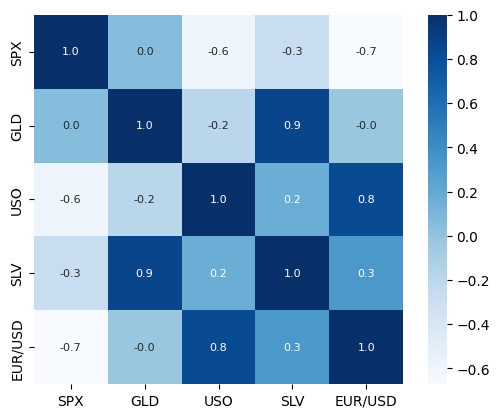

In [ ]:
rrr = gg.corr()
sns.heatmap(rrr, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

In [ ]:
print(rrr)

              SPX       GLD       USO       SLV   EUR/USD
SPX      1.000000  0.049345 -0.591573 -0.274055 -0.672017
GLD      0.049345  1.000000 -0.186360  0.866632 -0.024375
USO     -0.591573 -0.186360  1.000000  0.167547  0.829317
SLV     -0.274055  0.866632  0.167547  1.000000  0.321631
EUR/USD -0.672017 -0.024375  0.829317  0.321631  1.000000


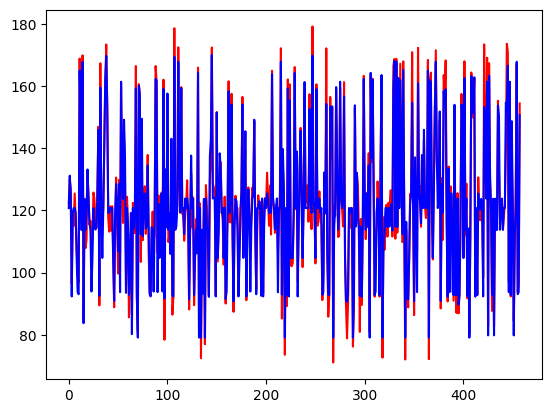

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)
forest = RandomForestRegressor(n_estimators=100, max_depth=4)
forest.fit(x_train, y_train)
lp = forest.predict(x_test)
pl = metrics.r2_score(lp, y_test)
nk = forest.predict(x_train)
kn = metrics.r2_score(nk, y_train)
y_test = list(y_test)
plt.plot(y_test, color='red')
plt.plot(lp, color='blue')

In [ ]:
print(pl)
print(kn)

0.9458547773045597
0.9522822825581191


Wine Quality

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

In [ ]:
ff = pd.read_csv('/content/winequality-red.csv')

In [ ]:
ff.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
ff.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [ ]:
ff.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [ ]:
ff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
ff.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import KFold
x = ff.drop(columns='quality', axis=1)
y = ff['quality'].apply(lambda ab: 1 if ab >= 7 else 0)
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, stratify=y, random_state=42)
pipeline = Pipeline([('classifier', RandomForestClassifier())])
param_grid = [{'classifier__n_estimators': [10,20,50,100,120,150],
               'classifier__criterion': ['gini','entropy'],
               'classifier__max_depth': list(range(1,10))}]
kfold = KFold(n_splits=10)
gr = GridSearchCV(pipeline, param_grid=param_grid, cv=kfold, scoring='accuracy')
gr.fit(x,y)

GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('classifier',
                                        RandomForestClassifier())]),
             param_grid=[{'classifier__criterion': ['gini', 'entropy'],
                          'classifier__max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                          'classifier__n_estimators': [10, 20, 50, 100, 120,
                                                       150]}],
             scoring='accuracy')

In [ ]:
score = cross_val_score(gr, x,y, cv=3, scoring='accuracy', n_jobs=-1)
print(score.mean())

0.8774233896185115


Parkison

In [ ]:
from sklearn.model_selection import cross_val_score
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
dd = pd.read_csv('/content/parkinsons.data')
dd.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [ ]:
dd.value_counts('status')
#0 q não é afetada por parkison

status
1    147
0     48
dtype: int64

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVC
x = dd.drop(columns=['name', 'status'], axis=1)
y = dd['status']
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)
st = StandardScaler()
xtrainstd = st.fit_transform(x_train)
xteststd = st.transform(x_test)
pol = PolynomialFeatures(degree=2, include_bias=True)
xtap = pol.fit_transform(xtrainstd)
xtep = pol.transform(xteststd)
log = Pipeline([('classifier', LogisticRegression())])
grid = [{'classifier__C': [0.01,0.1,1,10,20,30,40,50,60,70,80,90,100,110,20],
         'classifier__solver': ['liblinear'],
         'classifier__penalty': ['l2'],
         'classifier__max_iter': [1000],
         'classifier__class_weight': ['balanced']},
        {'classifier': [SVC()],
         'classifier__kernel': ['linear', 'rbf'],
         'classifier__C': [0.01,0.1,110,20,30,40,50,60,70,80,90,100,110,20]}]
gr = GridSearchCV(log, param_grid=grid, cv=5, scoring='accuracy')
gr.fit(xtap,y_train)
kfold = KFold(n_splits=10)
cr = cross_val_score(gr, xtap,y_train, cv=kfold, scoring='accuracy')
print(cr.mean())

0.89625


In [ ]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(gr, xtap, y_train)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train, y_train_pred, labels=(0,1))

array([[ 31,  10],
       [  9, 106]])

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train, y_train_pred, labels=(1,0))

array([[106,   9],
       [ 10,  31]])

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train, y_train_pred, labels=(1,0)).ravel()

array([106,   9,  10,  31])

In [ ]:
tp, fn, fp, tn = confusion_matrix(y_train, y_train_pred, labels=(1,0)).ravel()

In [ ]:
precision = tp/(tp+fp)
precision

0.9137931034482759

In [ ]:
gr.classes_

array([0, 1])

Iris KMeans

In [ ]:
import pandas as pd
import numpy as np
from sklearn import cluster
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_curve

In [ ]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.multiclass import OneVsOneClassifier
from sklearn.svm import LinearSVC
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

In [ ]:
iris = pd.read_csv('/content/iris_data.csv')
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
iris.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [ ]:
iris.columns = iris.columns.str.replace(' ','')

In [ ]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
x = iris.drop(columns='Species', axis=1)

In [ ]:
x.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2


In [ ]:
k = 3
kmeans = cluster.KMeans(n_clusters=3)
kmeans.fit(x)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [ ]:
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

In [ ]:
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [ ]:
y = iris['Species']

In [ ]:
pd.crosstab(y,labels)

col_0,0,1,2
Species,,,
Iris-setosa,50,0,0
Iris-versicolor,0,0,50
Iris-virginica,0,50,0


In [ ]:
df = pd.crosstab(y,labels)
column_titles = [0,2,1]
df.reindex(columns=column_titles)

col_0,0,2,1
Species,,,
Iris-setosa,50,0,0
Iris-versicolor,0,50,0
Iris-virginica,0,0,50


DBSCAN

In [ ]:
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_circles
from sklearn.preprocessing import StandardScaler

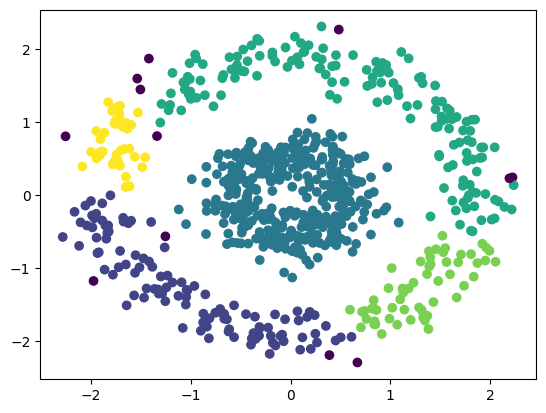

In [ ]:
x,y = make_circles(n_samples=750, factor=0.3, noise=0.1)
x = StandardScaler().fit_transform(x)
y_pred = DBSCAN(eps=0.3, min_samples=10).fit_predict(x)
plt.scatter(x[:,0], x[:,1], c=y_pred)

In [ ]:
print(metrics.homogeneity_score(y,y_pred))
print(metrics.completeness_score(y, y_pred))

1.0000000000000002
0.5067196190712848


Zoo

In [ ]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.multiclass import OneVsOneClassifier
from sklearn.svm import LinearSVC
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
import pandas as pd
import numpy as np
from sklearn import cluster
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_curve

In [ ]:
import pandas as pd
bg = pd.read_csv('/content/zoo.csv')
bg.head(5)

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [ ]:
bg.value_counts('class_type')

class_type
1    41
2    20
4    13
7    10
6     8
3     5
5     4
dtype: int64

In [ ]:
x = bg.drop(columns=['animal_name', 'class_type'], axis=1)
y = bg['class_type']

In [ ]:
from sklearn.preprocessing import StandardScaler
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, stratify=y, random_state=42)
st = StandardScaler()
xst = st.fit_transform(x_train)

In [ ]:
ovr = OneVsRestClassifier(XGBClassifier(n_estimators=100, random_state=42)).fit(x_train, y_train)

In [ ]:
print(ovr.score(x_test, y_test))

1.0


In [ ]:
from sklearn.metrics import accuracy_score
lp = ovr.predict(x_test)
pl = accuracy_score(lp, y_test)
vr = ovr.predict(x_train)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true=y_test, y_pred=lp)

array([[8, 0, 0, 0, 0, 0, 0],
       [0, 4, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 3, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 2, 0],
       [0, 0, 0, 0, 0, 0, 2]])

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true=y_train, y_pred=vr)

array([[33,  0,  0,  0,  0,  0,  0],
       [ 0, 16,  0,  0,  0,  0,  0],
       [ 0,  0,  4,  0,  0,  0,  0],
       [ 0,  0,  0, 10,  0,  0,  0],
       [ 0,  0,  0,  0,  3,  0,  0],
       [ 0,  0,  0,  0,  0,  6,  0],
       [ 0,  0,  0,  0,  0,  0,  8]])

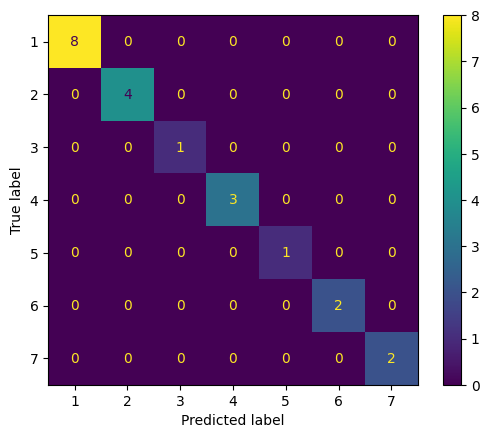

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(ovr, x_test, y_test)

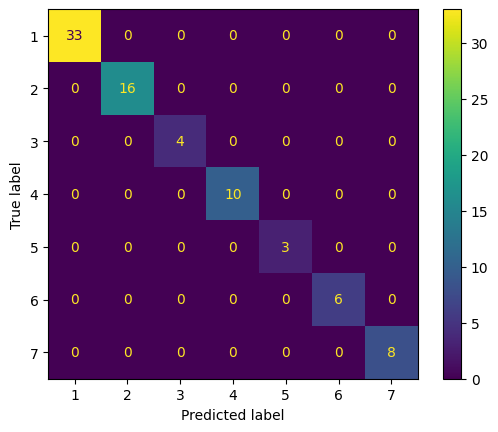

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(ovr, x_train, y_train)

In [ ]:
#oq estiver na diagonal é os acertos, e os de fora é os erros

In [ ]:
ovo = OneVsOneClassifier(XGBClassifier(n_estimators=100, random_state=42)).fit(x_train, y_train)

In [ ]:
print(ovo.score(x_test, y_test))
print(ovo.score(x_train, y_train))

0.9047619047619048
0.875


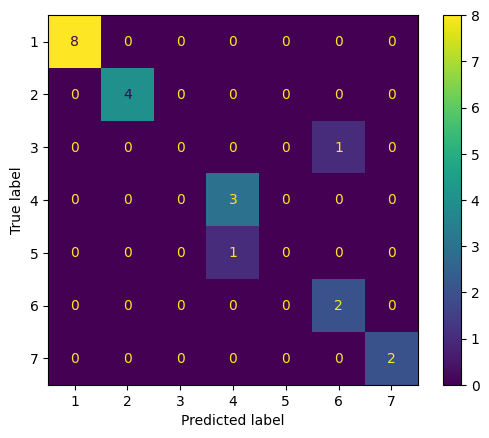

In [ ]:
ConfusionMatrixDisplay.from_estimator(ovo, x_test, y_test)

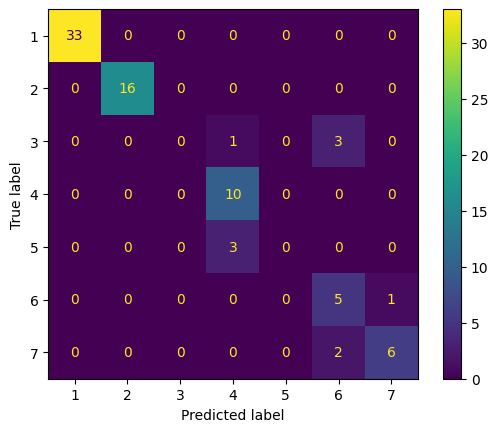

In [ ]:
ConfusionMatrixDisplay.from_estimator(ovo, x_train, y_train)

In [ ]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay
mods = []
mods.append(['lsv', 'ovr', OneVsRestClassifier(LinearSVC(max_iter=10000, tol=1e-5, random_state=42))])
#mods.append(['lgb', 'ovr', OneVsRestClassifier(LGBMClassifier(n_estimators=100, random_state=42))])
mods.append(['xgb', 'ovr', OneVsRestClassifier(XGBClassifier(n_estimators=100, random_state=42))])
metrics = []
for nome, metodo, mod in mods:
  mod.fit(x_train, y_train)
  y_predict = mod.predict(x_test)
  metrics.append([nome,
                  mod.score(x_train, y_train),
                  mod.score(x_test, y_test),
                  precision_score(y_test, y_predict, average='weighted'),
                  recall_score(y_test, y_predict, average='weighted'),
                  f1_score(y_test, y_predict, average='weighted')
                  ])
df = pd.DataFrame(metrics, columns=['Modelo',   'Acc Treino', 'Acc Test', 'Precision', 'Recall', 'F1'])
display(df)

,Modelo,Acc Treino,Acc Test,Precision,Recall,F1
0,lsv,1.0,1.0,1.0,1.0,1.0
1,xgb,1.0,1.0,1.0,1.0,1.0


CustomerID DBSCAN

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN
x,y = make_moons(n_samples=200, noise=0.1)
x[0:5]

array([[ 0.10248607, -0.12277448],
       [-0.73350215,  0.77990448],
       [ 2.19368296,  0.17585455],
       [ 0.78601252,  0.51780797],
       [-0.60199376,  0.90722131]])

In [ ]:
model = DBSCAN(eps=0.25, min_samples=10)
model.fit(x)

DBSCAN(eps=0.25, min_samples=10)

In [ ]:
model.labels_

array([ 0,  1,  0,  1,  1,  0,  0,  1,  1,  1,  0,  1,  1,  0,  0,  2,  0,
        1,  1,  0,  0,  1,  1,  1,  0,  0,  0,  0,  1,  1,  0,  1, -1,  1,
        1,  1,  1,  0,  1,  0,  1,  0,  0,  0,  0,  0,  1,  1,  1,  0,  0,
        2,  0,  1,  1,  1,  0,  0, -1,  1,  0,  0,  1,  0,  1,  0, -1,  1,
        0,  0,  2,  1,  1,  0,  0,  0,  2,  0,  0,  1,  0,  0,  2,  1,  1,
        0,  0,  1,  0,  0,  1,  0,  0,  1,  1,  0,  1,  0,  1,  2,  1,  0,
        1,  2,  0,  0,  2,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        0,  0,  0,  1,  2,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        0,  0,  1,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  2,  1,  1,
        1,  1,  0,  0,  1,  1,  1,  0,  0,  1,  0,  0,  1,  0,  1,  1,  1,
        0,  1,  0,  0,  1,  1,  0,  0, -1,  0,  1,  0,  1,  2,  2,  0,  1,
        1,  1,  1,  0,  1,  1,  0,  0,  0,  1,  1,  1,  0])

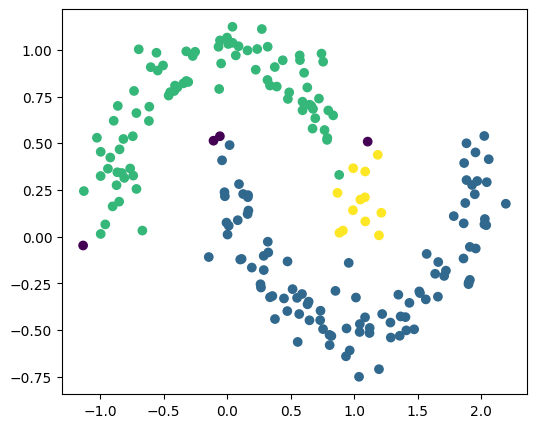

In [ ]:
fig, ax = plt.subplots(figsize=(6,5))
ax.scatter(x[:,0], x[:,1], c=model.labels_)

Hierarquico Cluster

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from scipy.cluster import hierarchy
import geopandas
from scipy.cluster.hierarchy import dendrogram, linkage

In [ ]:


from google.colab import files

uploaded = files.upload()


Saving gdp_csv.csv to gdp_csv.csv


In [ ]:


import pandas as pd
import io

df = pd.read_csv(io.BytesIO(uploaded['gdp_csv.csv']))
print(df)


      Country Name Country Code  Year         Value
0       Arab World          ARB  1968  2.576068e+10
1       Arab World          ARB  1969  2.843420e+10
2       Arab World          ARB  1970  3.138550e+10
3       Arab World          ARB  1971  3.642691e+10
4       Arab World          ARB  1972  4.331606e+10
...            ...          ...   ...           ...
11502     Zimbabwe          ZWE  2012  1.424249e+10
11503     Zimbabwe          ZWE  2013  1.545177e+10
11504     Zimbabwe          ZWE  2014  1.589105e+10
11505     Zimbabwe          ZWE  2015  1.630467e+10
11506     Zimbabwe          ZWE  2016  1.661996e+10

[11507 rows x 4 columns]


In [ ]:
df.value_counts('Country Code').unique()

array([57, 56, 55, 54, 53, 52, 51, 50, 49, 48, 47, 46, 42, 41, 40, 39, 38,
       37, 36, 35, 33, 32, 31, 30, 29, 28, 27, 26, 24, 23, 22, 21, 20, 18,
       17, 16, 15, 10,  8,  4,  2])

In [ ]:
df.isnull().sum()

Country Name    0
Country Code    0
Year            0
Value           0
dtype: int64

In [ ]:
df.drop(columns=['Country Name', 'Country Code'], axis=1, inplace=True)

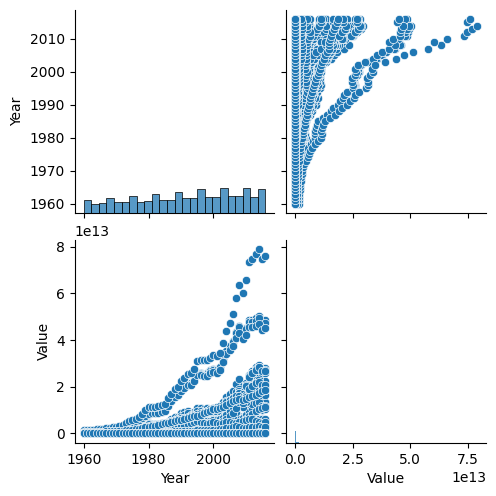

In [ ]:
sns.pairplot(df)

In [ ]:
from sklearn.preprocessing import StandardScaler
ed = df.copy()
ed = StandardScaler().fit_transform(df)

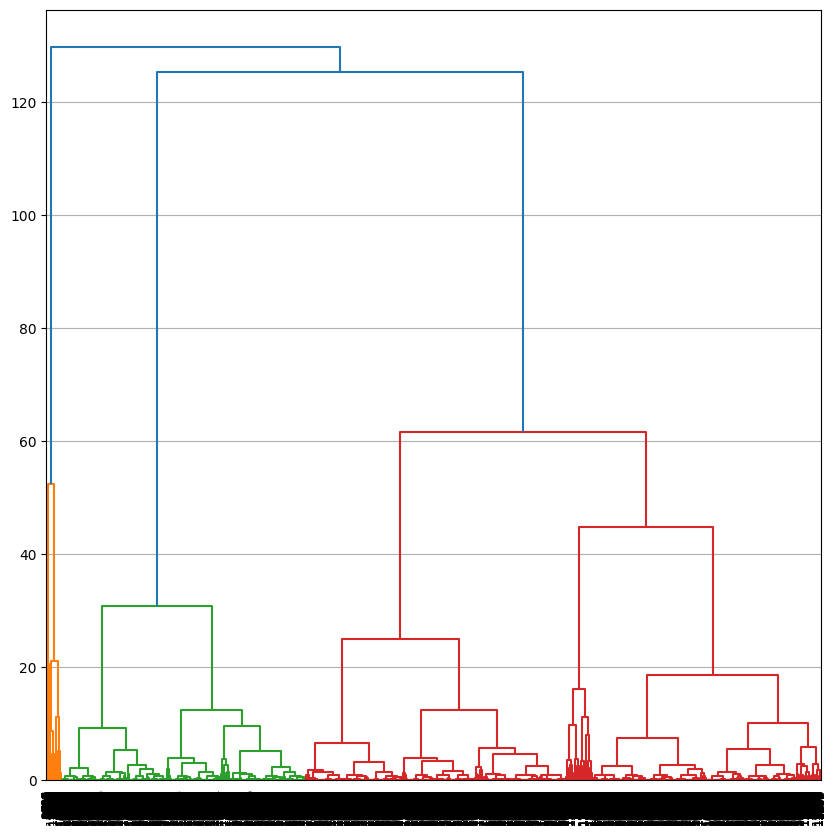

In [ ]:
z= hierarchy.linkage(ed, 'ward')
plt.figure(figsize=[10,10])
plt.grid(axis='y')
dm = hierarchy.dendrogram(z, labels=list(df.index), leaf_font_size=8)

In [ ]:
kp = pd.read_csv('/content/gdp_csv.csv')

In [ ]:
kp.value_counts('Country Name')

Country Name
Zimbabwe                   57
IDA total                  57
Hong Kong SAR, China       57
South Asia (IDA & IBRD)    57
IBRD only                  57
                           ..
Nauru                      10
Channel Islands            10
South Sudan                 8
Somalia                     4
Cayman Islands              2
Length: 256, dtype: int64

In [ ]:
kp['Country Name'].unique()

array(['Arab World', 'Caribbean small states',
       'Central Europe and the Baltics', 'Early-demographic dividend',
       'East Asia & Pacific',
       'East Asia & Pacific (excluding high income)',
       'East Asia & Pacific (IDA & IBRD countries)', 'Euro area',
       'Europe & Central Asia',
       'Europe & Central Asia (excluding high income)',
       'Europe & Central Asia (IDA & IBRD countries)', 'European Union',
       'Fragile and conflict affected situations',
       'Heavily indebted poor countries (HIPC)', 'High income',
       'IBRD only', 'IDA & IBRD total', 'IDA blend', 'IDA only',
       'IDA total', 'Late-demographic dividend',
       'Latin America & Caribbean',
       'Latin America & Caribbean (excluding high income)',
       'Latin America & the Caribbean (IDA & IBRD countries)',
       'Least developed countries: UN classification',
       'Low & middle income', 'Low income', 'Lower middle income',
       'Middle East & North Africa',
       'Middle East & No

In [ ]:
x = kp['Country Name']

In [ ]:
n_clusters = 3
cluster = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean', linkage='ward')
groups = cluster.fit_predict(ed)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [ ]:
groups

array([2, 2, 2, ..., 0, 0, 0])

In [ ]:
df['grous'] = groups
df['Country Name'] = x
df.tail()

,Year,Value,grous,Country Name
11502,2012,1.424249e+10,0,Zimbabwe
11503,2013,1.545177e+10,0,Zimbabwe
11504,2014,1.589105e+10,0,Zimbabwe
11505,2015,1.630467e+10,0,Zimbabwe
11506,2016,1.661996e+10,0,Zimbabwe


In [ ]:
df.head()

,Year,Value,grous,Country Name
0,1968,2.576068e+10,2,Arab World
1,1969,2.843420e+10,2,Arab World
2,1970,3.138550e+10,2,Arab World
3,1971,3.642691e+10,2,Arab World
4,1972,4.331606e+10,2,Arab World


Covid

In [ ]:
import pandas as pd
cov = pd.read_csv('/content/covid_flu.csv')
cov.head()

,Diagnosis,InitialPCRDiagnosis,Age,Sex,neutrophil,serumLevelsOfWhiteBloodCell,lymphocytes,CReactiveProteinLevels,DurationOfIllness,CTscanResults,RiskFactors,GroundGlassOpacity,Diarrhea,Fever,Coughing,ShortnessOfBreath,SoreThroat,NauseaVomitting,Temperature,Fatigue
0,H1N1,NaN,67.0,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Yes,NaN,No,NaN,38.111111,No
1,H1N1,NaN,29.0,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,H1N1,NaN,22.0,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,H1N1,NaN,20.0,F,NaN,NaN,NaN,NaN,NaN,NaN,immuno,NaN,NaN,Yes,Yes,NaN,No,NaN,36.555556,Yes
4,H1N1,NaN,21.0,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
x= cov.drop(columns='Diagnosis', axis=1)
y= cov['Diagnosis']

In [ ]:
ass = pd.get_dummies(x)

In [ ]:
ass.head()

,Age,neutrophil,serumLevelsOfWhiteBloodCell,lymphocytes,DurationOfIllness,Temperature,InitialPCRDiagnosis_No,InitialPCRDiagnosis_Yes,Sex_F,Sex_M,...,Coughing_No,Coughing_Yes,ShortnessOfBreath_No,ShortnessOfBreath_Yes,SoreThroat_No,SoreThroat_Yes,NauseaVomitting_No,NauseaVomitting_Yes,Fatigue_No,Fatigue_Yes
0,67.0,NaN,NaN,NaN,NaN,38.111111,0,0,1,0,...,0,1,0,0,1,0,0,0,1,0
1,29.0,NaN,NaN,NaN,NaN,NaN,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,22.0,NaN,NaN,NaN,NaN,NaN,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,20.0,NaN,NaN,NaN,NaN,36.555556,0,0,1,0,...,0,1,0,0,1,0,0,0,0,1
4,21.0,NaN,NaN,NaN,NaN,NaN,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
simple = SimpleImputer(strategy='mean')
xx = simple.fit_transform(ass)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
x_train, x_test, y_train, y_test = train_test_split(xx,y, test_size=0.2, random_state=42, stratify=y)
st = StandardScaler()
xta = st.fit_transform(x_train)
xte = st.transform(x_test)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
pipe = Pipeline([('classifier', RandomForestClassifier())])
grid = [{'classifier__n_estimators': [10,20,50,80,100,120,150],
         'classifier__criterion': ['gini', 'entropy'],
         'classifier__max_depth': list(range(1,10))},
        {'classifier': [SVC()],
         'classifier__kernel': ['linear', 'rbf'],
         'classifier__C': [0.001,0.01,0.1,1,10,20,30,50,80,100],
         'classifier__gamma': [0.001,0.01,0.1,1,10,20,30,50,80,100]}]
gr = GridSearchCV(pipe, param_grid=grid, cv=3, scoring='accuracy')
gr.fit(xta, y_train)

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
score = cross_val_score(gr, xta, y_train, cv=3, scoring='accuracy')
print(score.mean())

0.940928270042194


In [ ]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(gr, xta, y_train)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train, y_train_pred)

array([[295,  33],
       [ 32, 825]])

In [ ]:
gr.classes_

array(['COVID19', 'H1N1'], dtype=object)

In [ ]:
confusion_matrix(y_train, y_train_pred, labels=('H1N1','COVID19'))

array([[825,  32],
       [ 33, 295]])